In [ ]:
!pip install wfdb
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 77.8 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


In [ ]:
!pip install wfdb matplotlib # Install wfdb and matplotlib
import wfdb
import numpy as np
import matplotlib.pyplot as plt

record = wfdb.rdrecord('100', pn_dir='mitdb')  # ECG de l’enregistrement 100
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')
record = wfdb.rdrecord('100', pn_dir='mitdb')  # ECG de l’enregistrement 100
annotation = wfdb.rdann('100', 'atr', pn_dir='mitdb')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 163.8/163.8 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


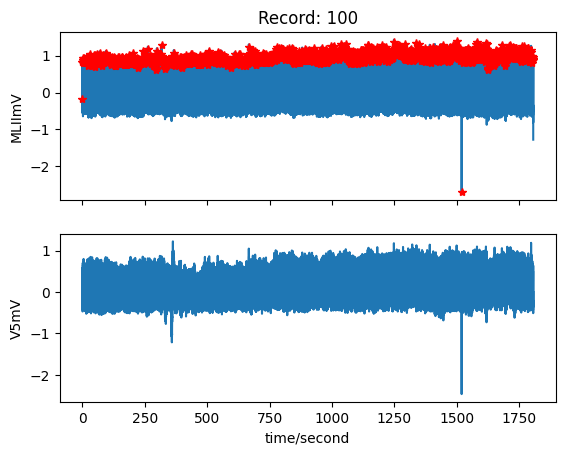

In [ ]:
wfdb.plot_wfdb(record=record, annotation=annotation)

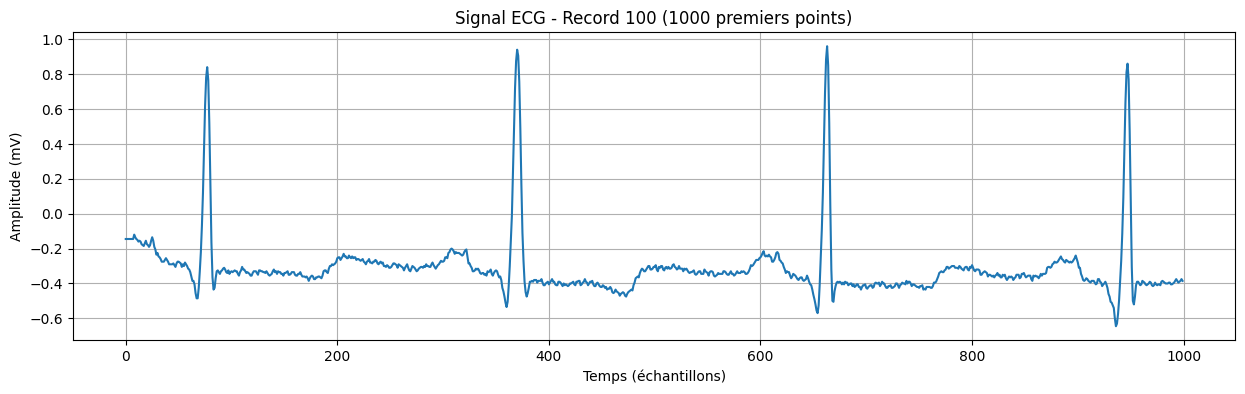

In [5]:
plt.figure(figsize=(15, 4))
plt.plot(record.p_signal[:1000, 0])  # Canal MLII
plt.title("Signal ECG - Record 100 (1000 premiers points)")
plt.xlabel("Temps (échantillons)")
plt.ylabel("Amplitude (mV)")
plt.grid(True)
plt.show()


In [6]:
import numpy as np

def extract_beats(record, annotation, beat_window=100):
    beats = []
    labels = []
    for idx, label in zip(annotation.sample, annotation.symbol):
        if label in ['N', 'V', 'A', 'L', 'R']:  # Exemples de battements connus
            start = idx - beat_window // 2
            end = idx + beat_window // 2
            if start >= 0 and end <= len(record.p_signal):
                beat = record.p_signal[start:end, 0]
                beats.append(beat)
                labels.append(label)
    return np.array(beats), np.array(labels)

beats, labels = extract_beats(record, annotation)
print(f"{len(beats)} battements extraits : {np.unique(labels, return_counts=True)}")


2272 battements extraits : (array(['A', 'N', 'V'], dtype='<U1'), array([  33, 2238,    1]))


In [9]:
from sklearn.metrics import classification_report

In [10]:
# Définir explicitement les labels présents dans tout l'ensemble
labels = encoder.transform(encoder.classes_)  # par ex. [0, 1, 2]

# Évaluation
print(classification_report(y_test, y_pred, labels=labels, target_names=encoder.classes_))

              precision    recall  f1-score   support

           A       1.00      0.11      0.20         9
           N       0.98      1.00      0.99       446
           V       0.00      0.00      0.00         0

    accuracy                           0.98       455
   macro avg       0.66      0.37      0.40       455
weighted avg       0.98      0.98      0.98       455



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/me